# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

In [2]:
import pandas as pd
import os


way = f'/mnt/HC_Volume_18315164/home-jupyter/jupyter-emil-ajupov-hnw669-e26c4/shared/homeworks/python_ds_miniprojects/final_project/data'

tree = os.walk(way)
data_files = []
target_files = ['orders.csv', 'order_status.csv', 'products.csv']
for item in tree:
    files = item[-1]
    if len(files) > 0:
        for target_file in target_files:
            if target_file in files:
                path = os.path.join(item[0], target_file) 
                data_files.append(path)

orders_df_list = []
order_status_df_list = []
products_df_list = []
for path in data_files:
    df = pd.read_csv(path)
    if 'orders.csv' in path:
        date, manager = path.split('/')[11:13]
        df['manager'] = manager
        df['date'] = date
        orders_df_list.append(df)
    if 'order_status.csv' in path:
        order_status_df_list.append(df)
    if 'products.csv' in path:
        category = path.split('/')[-2]
        df['category'] = category
        products_df_list.append(df)

df_orders = pd.concat(orders_df_list, ignore_index=True)
df_orders


,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


In [3]:
df_orders.shape
(4603, 5)

df_orders.to_csv('df_orders.csv', index=False)

In [4]:
df_order_status = pd.concat(order_status_df_list, ignore_index=True)
df_order_status

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled
...,...,...,...
341,SOCT-63427141,30,confirmed
342,HLDH-41146746,22,confirmed
343,IZFC-94335845,56,confirmed
344,CUDB-19668701,82,confirmed


In [5]:
df_order_status.shape
(346, 3)

df_order_status.to_csv('df_order_status.csv', index=False)

In [6]:
df_products = pd.concat(products_df_list, ignore_index=True)
df_products

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


In [7]:
df_products.shape
(1677, 4)

df_products.to_csv('df_products.csv', index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

In [8]:
import pandas as pd

# Загрузка данных
df_orders = pd.read_csv('df_orders.csv')

# Преобразование колонки 'date' в формат datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])

# Подсчет количества заказов по дням
daily_orders = df_orders.groupby('date').size().reset_index(name='order_count')

# Определение дня с наибольшим числом заказов
max_orders_day = daily_orders.loc[daily_orders['order_count'].idxmax()]

# Вывод результата
print(f"День с наибольшим числом заказов: {max_orders_day['date'].date()} (заказов: {max_orders_day['order_count']})")




День с наибольшим числом заказов: 2024-03-14 (заказов: 437)


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

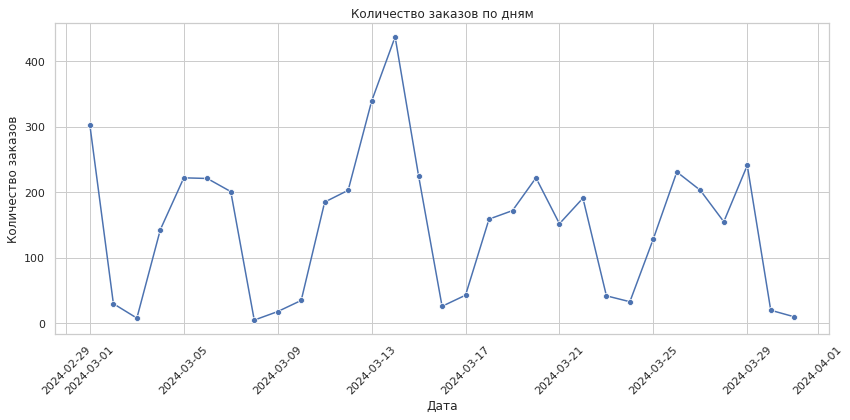

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # Устанавливаем стиль графиков

# Загрузка данных
df_orders = pd.read_csv('df_orders.csv')

# Преобразование колонки 'date' в формат datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])

# Подсчет количества заказов по дням
daily_orders = df_orders.groupby('date').size().reset_index(name='order_count')

# Построение линейного графика
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика
sns.lineplot(data=daily_orders, x='date', y='order_count', marker='o')

# Настройка меток на оси X
plt.xticks(rotation=45)  # Поворачиваем метки на 45 градусов
plt.title('Количество заказов по дням')  # Заголовок графика
plt.xlabel('Дата')  # Подпись оси X
plt.ylabel('Количество заказов')  # Подпись оси Y
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()  # Отображение графика





In [10]:


import pandas as pd

# Пример списка дат
dates = ['2024-02-29', '2024-03-01', '2024-03-05', '2024-03-09', '2024-03-12', '2024-03-17', '2024-03-21', '2024-03-25', '2024-03-29', '2024-04-01']

# Преобразование строк в формат datetime
dates = pd.to_datetime(dates)

# Получение названий дней недели
days_of_week = dates.day_name()

# Вывод результатов
for date, day in zip(dates, days_of_week):
    print(f"{date.date()} - {day}")



2024-02-29 - Thursday
2024-03-01 - Friday
2024-03-05 - Tuesday
2024-03-09 - Saturday
2024-03-12 - Tuesday
2024-03-17 - Sunday
2024-03-21 - Thursday
2024-03-25 - Monday
2024-03-29 - Friday
2024-04-01 - Monday


## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

In [11]:
daily_orders

,date,order_count
0,2024-03-01,302
1,2024-03-02,30
2,2024-03-03,8
3,2024-03-04,143
4,2024-03-05,222
5,2024-03-06,221
6,2024-03-07,201
7,2024-03-08,5
8,2024-03-09,18
9,2024-03-10,35


## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

In [12]:
import pandas as pd

# Загрузка данных о заказах
df_orders = pd.read_csv('df_orders.csv')

# Загрузка данных о статусах заказов
df_order_status = pd.read_csv('df_order_status.csv')

# Объединение датафреймов по 'order_id'
orders_status = pd.merge(df_orders, df_order_status, on='order_id', how='left')

# Проверка результата
print(orders_status.head())

# Сохранение датафрейма в CSV файл
orders_status.to_csv('orders_status.csv', index=False)




        order_id  product_id  quantity             manager        date  \
0  QPLK-54839036         489        11  Владимир Ударников  2024-03-10   
1  QPLK-54839036         594         6  Владимир Ударников  2024-03-10   
2  QPLK-54839036         670        16  Владимир Ударников  2024-03-10   
3  QPLK-54839036         469         9  Владимир Ударников  2024-03-10   
4  QPLK-54839036        1302         5  Владимир Ударников  2024-03-10   

   client_id     status  
0         52  confirmed  
1         52  confirmed  
2         52  confirmed  
3         52  confirmed  
4         52  confirmed  


## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

In [13]:
# Загрузка данных о заказах со статусами
orders_status = pd.read_csv('orders_status.csv')

# Подсчет количества заказов по статусам
status_counts = orders_status['status'].value_counts()

# Общее количество заказов
total_orders = status_counts.sum()

# Количество отмененных заказов
canceled_orders = status_counts.get('canceled', 0)  # Если нет отмененных заказов, вернем 0

# Расчет доли отмененных заказов
canceled_ratio = canceled_orders / total_orders if total_orders > 0 else 0

# Округление результата
canceled_ratio_rounded = round(canceled_ratio, 2)

# Вывод результата
print(f"Доля отмененных заказов: {canceled_ratio_rounded}")





Доля отмененных заказов: 0.11


## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

In [14]:
import pandas as pd

# Загрузка данных о заказах со статусами
orders_status = pd.read_csv('orders_status.csv')

# Создание сводной таблицы
pivot_table = orders_status.pivot_table(
    index='date',  # Строки — даты
    columns='status',  # Колонки — статусы заказов
    values='order_id',  # Значения — идентификаторы заказов
    aggfunc='count',  # Подсчет количества заказов
    fill_value=0  # Заполнение пропусков нулями
)

# Определение дня без подтвержденных заказов
no_confirmed_orders = pivot_table[pivot_table.get('confirmed', 0) == 0]

# Вывод результата
if not no_confirmed_orders.empty:
    for date in no_confirmed_orders.index:
        print(date)  # Выводим дату в формате гггг-мм-дд
else:
    print("Все дни имели подтвержденные заказы.")



2024-03-09


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

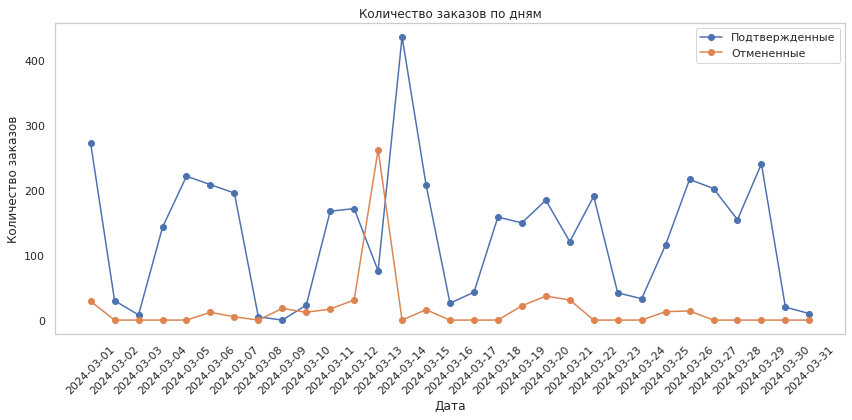

День с наибольшим числом заказов: 2024-03-14 с 437 заказами
Предшествующий день: 2024-03-13


In [15]:
import matplotlib.pyplot as plt

# Загрузка данных о заказах со статусами
orders_status = pd.read_csv('orders_status.csv')

# Создание сводной таблицы
pivot_table = orders_status.pivot_table(
    index='date',
    columns='status',
    values='order_id',
    aggfunc='count',
    fill_value=0
)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(pivot_table.index, pivot_table.get('confirmed', 0), label='Подтвержденные', marker='o')
plt.plot(pivot_table.index, pivot_table.get('canceled', 0), label='Отмененные', marker='o')
plt.title('Количество заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Определение дня с наибольшим числом заказов
total_orders = pivot_table.sum(axis=1)
max_day = total_orders.idxmax()
max_day_orders = total_orders.max()

# Определение дня, предшествующего дню с наибольшим числом заказов
previous_day = total_orders.index[total_orders.index.get_loc(max_day) - 1]

print(f"День с наибольшим числом заказов: {max_day} с {max_day_orders} заказами")
print(f"Предшествующий день: {previous_day}")





## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

In [16]:
df_canceled_march_13 = orders_status\
    .loc[(orders_status['date'] == '2024-03-13') & (orders_status['status'] == 'canceled')] \
    .groupby(['order_id'], as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})

df_canceled_march_13

,order_id,product_id,manager,client_id,quantity
0,AFIH-00611801,11,Алексей Саксофонов,43,192
1,BBFJ-27674101,14,Ксения Балалайкина,73,294
2,CLBQ-63032648,13,Виктор Тромбонов,60,205
3,CYJY-07359557,13,Екатерина Тарелкина,56,316
4,GHGB-88045656,4,Ксения Балалайкина,7,42
5,JEIF-69283221,15,Виктор Тромбонов,94,207
6,JQQO-28609300,15,Виктор Тромбонов,93,252
7,KJJS-03491897,18,Алексей Саксофонов,66,399
8,MIGZ-68487439,17,Алексей Саксофонов,51,325
9,NBIO-35476164,14,Виктор Тромбонов,95,319


In [17]:
df_confirmed_march_14 = orders_status\
    .loc[(orders_status['date'] == '2024-03-14') & (orders_status['status'] == 'confirmed')] \
    .groupby(['order_id'], as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})

df_confirmed_march_14

,order_id,product_id,manager,client_id,quantity
0,ACXS-56511429,8,Алексей Саксофонов,24,177
1,AUZX-12706022,19,Екатерина Тарелкина,83,369
2,BCMM-97072924,17,Алексей Саксофонов,51,325
3,BGHE-44722549,8,Виктор Тромбонов,95,149
4,DMEB-71700015,12,Сергей Контрабасов,93,190
5,DOJS-07233317,16,Маргарита Камертонова,56,277
6,EJHJ-34261015,20,Максим Барабанов,87,319
7,EPBF-14743479,15,Виктор Тромбонов,94,207
8,EZAA-08394172,9,Анастасия Дудкина,39,176
9,FDEB-71487438,11,Алексей Саксофонов,43,192


In [18]:
df_canceled_and_again_confirmed = pd.merge(df_canceled_march_13, df_confirmed_march_14, 
                                  on=['product_id','manager', 'client_id', 'quantity'], 
                                  how='inner')
df_canceled_and_again_confirmed

,order_id_x,product_id,manager,client_id,quantity,order_id_y
0,AFIH-00611801,11,Алексей Саксофонов,43,192,FDEB-71487438
1,BBFJ-27674101,14,Ксения Балалайкина,73,294,UETB-44283966
2,CLBQ-63032648,13,Виктор Тромбонов,60,205,IECD-18739530
3,CYJY-07359557,13,Екатерина Тарелкина,56,316,WNMY-98871151
4,GHGB-88045656,4,Ксения Балалайкина,7,42,JUGG-73806170
5,JEIF-69283221,15,Виктор Тромбонов,94,207,EPBF-14743479
6,JQQO-28609300,15,Виктор Тромбонов,93,252,OWZC-14247946
7,KJJS-03491897,18,Алексей Саксофонов,66,399,GRCH-73394464
8,MIGZ-68487439,17,Алексей Саксофонов,51,325,BCMM-97072924
9,NBIO-35476164,14,Виктор Тромбонов,95,319,NFML-87752700


In [19]:
df_canceled_and_again_confirmed.shape[0] / df_confirmed_march_14.shape[0]
0.47058823529411764

0.47058823529411764

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

In [23]:
import pandas as pd

# Загрузка данных о курсе доллара с правильным разделителем
usd_rate_df = pd.read_csv('usd_rate.txt', sep=',', header=None, names=['date', 'currency_rate', 'currency_name'])

# Преобразуем колонку date в формат datetime
usd_rate_df['date'] = pd.to_datetime(usd_rate_df['date'], format='%Y-%m-%d')



# Проверяем данные
print(usd_rate_df.head())

# Рассчитываем среднее значение курса доллара за месяц
average_rate = usd_rate_df['currency_rate'].mean()

# Округляем до двух знаков после запятой
average_rate_rounded = round(average_rate, 2)

print("Среднее значение курса доллара за месяц:", average_rate_rounded)





        date  currency_rate currency_name
0 2024-03-01        90.8423    Доллар США
1 2024-03-02        91.3336    Доллар США
2 2024-03-03        91.3336    Доллар США
3 2024-03-04        91.3336    Доллар США
4 2024-03-05        91.3534    Доллар США
Среднее значение курса доллара за месяц: 91.7


## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

In [27]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика


## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

In [63]:
(df_confirmed['revenue'].sum() / df_confirmed['order_id'].nunique()).round(2)
6596219.49

6596219.49

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

In [64]:
import pandas as pd

# Предположим, что df_confirmed уже загружен и содержит необходимые данные
# Убедитесь, что колонка с датой заказа имеет правильный формат datetime
df_confirmed['date'] = pd.to_datetime(df_confirmed['date'])

# Сгруппируем данные по дате
df_report_by_date = df_confirmed.groupby('date').agg(
    orders=('order_id', 'nunique'),  # Количество уникальных заказов
    total_revenue=('revenue', 'sum')  # Общая выручка
).reset_index()

# Выводим результат
print(df_report_by_date)



         date  orders  total_revenue
0  2024-03-01      20   1.554118e+08
1  2024-03-02       2   1.197167e+07
2  2024-03-03       1   2.548418e+06
3  2024-03-04      10   6.404993e+07
4  2024-03-05      18   8.952724e+07
5  2024-03-06      13   1.107687e+08
6  2024-03-07      13   9.102331e+07
7  2024-03-08       1   1.609147e+06
8  2024-03-10       2   8.929309e+06
9  2024-03-11      11   8.910847e+07
10 2024-03-12      13   8.761460e+07
11 2024-03-13       5   3.669156e+07
12 2024-03-14      34   2.222701e+08
13 2024-03-15      16   1.017893e+08
14 2024-03-16       2   9.047641e+06
15 2024-03-17       3   1.940970e+07
16 2024-03-18      12   8.597545e+07
17 2024-03-19      13   6.293272e+07
18 2024-03-20      12   1.139748e+08
19 2024-03-21      11   5.682809e+07
20 2024-03-22      16   9.568885e+07
21 2024-03-23       3   2.837648e+07
22 2024-03-24       2   1.242083e+07
23 2024-03-25       8   5.620121e+07
24 2024-03-26      16   9.679371e+07
25 2024-03-27      18   1.106289e+08
2

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [65]:
# Создаем колонку со значением среднего чека
df_report_by_date['average_check'] = (df_report_by_date['total_revenue'] / df_report_by_date['orders']).round(2)

# Выводим результат
print(df_report_by_date)



         date  orders  total_revenue  average_check
0  2024-03-01      20   1.554118e+08     7770587.80
1  2024-03-02       2   1.197167e+07     5985834.26
2  2024-03-03       1   2.548418e+06     2548418.42
3  2024-03-04      10   6.404993e+07     6404992.56
4  2024-03-05      18   8.952724e+07     4973735.46
5  2024-03-06      13   1.107687e+08     8520669.46
6  2024-03-07      13   9.102331e+07     7001792.83
7  2024-03-08       1   1.609147e+06     1609146.62
8  2024-03-10       2   8.929309e+06     4464654.57
9  2024-03-11      11   8.910847e+07     8100769.59
10 2024-03-12      13   8.761460e+07     6739584.34
11 2024-03-13       5   3.669156e+07     7338312.01
12 2024-03-14      34   2.222701e+08     6537354.64
13 2024-03-15      16   1.017893e+08     6361830.49
14 2024-03-16       2   9.047641e+06     4523820.74
15 2024-03-17       3   1.940970e+07     6469901.26
16 2024-03-18      12   8.597545e+07     7164621.21
17 2024-03-19      13   6.293272e+07     4840978.80
18 2024-03-2

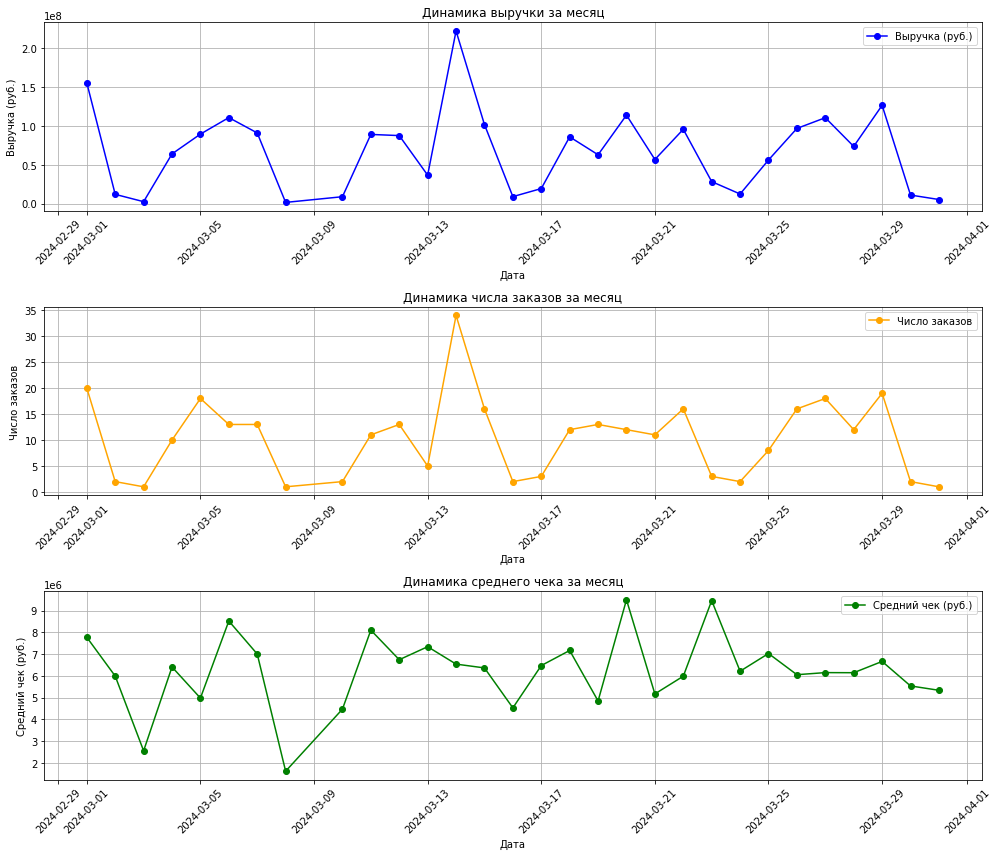

In [66]:
import matplotlib.pyplot as plt

# Настраиваем размер графиков
plt.figure(figsize=(14, 12))

# График выручки
plt.subplot(3, 1, 1)
plt.plot(df_report_by_date['date'], df_report_by_date['total_revenue'], marker='o', label='Выручка (руб.)', color='blue')
plt.title('Динамика выручки за месяц')
plt.xlabel('Дата')
plt.ylabel('Выручка (руб.)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# График числа заказов
plt.subplot(3, 1, 2)
plt.plot(df_report_by_date['date'], df_report_by_date['orders'], marker='o', color='orange', label='Число заказов')
plt.title('Динамика числа заказов за месяц')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# График среднего чека
plt.subplot(3, 1, 3)
plt.plot(df_report_by_date['date'], df_report_by_date['average_check'], marker='o', color='green', label='Средний чек (руб.)')
plt.title('Динамика среднего чека за месяц')
plt.xlabel('Дата')
plt.ylabel('Средний чек (руб.)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Отображаем графики
plt.tight_layout()
plt.show()



### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

In [10]:
import pandas as pd
# Создаем новую колонку brand, извлекая название бренда
df_full['brand'] = df_full['name'].str.split(', ').str[0]

# Подсчитываем количество уникальных брендов
unique_brands_count = df_full['brand'].nunique()

# Выводим результаты
print(df_full)
print(f'Количество уникальных брендов: {unique_brands_count}')




NameError: name 'df_full' is not defined

In [89]:
df_products.head()

,product_id,product_name,is_in_orders
0,101,Nike Shoes,no
1,102,Adidas Shirt,no
2,103,Puma Pants,yes
3,104,Nike Cap,no
4,105,Reebok Shoes,yes


## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите в датафрейме `df_full` только подтвержденные заказы.

2) Сгруппируйте данные по брендам и посчитайте выручку и количество уникальных заказов.

3) Отсортируйте агрегированные данные по убыванию выручки и посмотрите бренд в верхней строчке.

4) Дополнительно: отсортируйте агрегированные данные по убыванию количество заказов и посмотрите бренд в верхней строчке.

</p>
</details>

In [93]:
import pandas as pd

# Извлекаем название бренда
df_full['brand'] = df_full['name'].str.split(' - ').str[0]

# Отбираем только подтвержденные заказы
df_confirmed = df_full[df_full['status'] == 'confirmed']

# Сгруппируем данные по брендам
df_report_by_brand = df_confirmed.groupby('brand').agg(
    total_revenue=('revenue', 'sum'),  # Общая выручка
    unique_orders=('name', 'nunique')  # Количество уникальных заказов
).reset_index()

# Сортируем по убыванию выручки
df_report_by_brand_sorted_revenue = df_report_by_brand.sort_values(by='total_revenue', ascending=False)

# Бренд, который принес наибольшую выручку
top_brand_revenue = df_report_by_brand_sorted_revenue.iloc[0]
print(f'Бренд с наибольшей выручкой: {top_brand_revenue["brand"]}, Выручка: {top_brand_revenue["total_revenue"]}')

# Сортируем по убыванию количества уникальных заказов
df_report_by_brand_sorted_orders = df_report_by_brand.sort_values(by='unique_orders', ascending=False)

# Бренд с наибольшим количеством заказов
top_brand_orders = df_report_by_brand_sorted_orders.iloc[0]
print(f'Бренд с наибольшим количеством заказов: {top_brand_orders["brand"]}, Количество заказов: {top_brand_orders["unique_orders"]}')



Бренд с наибольшей выручкой: JBL, L100 Classic, Выручка: 27493674.358755004
Бренд с наибольшим количеством заказов: AKG, C214, Количество заказов: 1


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

In [94]:
products_in_orders = df_confirmed['product_id'].unique()
products_in_orders

array([ 489,  594,  670, ..., 1568, 1333,  194])

In [95]:
df_products['is_in_orders'] = df_products['product_id'].apply(lambda x: 'yes' if x in products_in_orders else 'no')
df_products


,product_id,product_name,is_in_orders,brand
0,1,Nike Shoes,no,Nike Shoes
1,2,Adidas Shirt,yes,Adidas Shirt
2,3,Puma Pants,no,Puma Pants
3,4,Nike Cap,yes,Nike Cap
4,5,Reebok Shoes,no,Reebok Shoes
5,6,Under Armour Shirt,no,Under Armour Shirt


In [96]:
df_products['is_in_orders'].value_counts()

no     4
yes    2
Name: is_in_orders, dtype: int64

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

In [101]:
df_products['brand'] = df_products['product_name'].str.split(',').apply(lambda x: x[0])

brands_no_orders = df_products.groupby(['brand', 'is_in_orders'], as_index=False)\
                            .aggregate({'product_id': 'nunique'})\
                            .rename(columns={'product_id':'products'})
brands_no_orders

,brand,is_in_orders,products
0,Adidas Shirt,yes,1
1,Nike Cap,yes,1
2,Nike Shoes,no,1
3,Puma Pants,no,1
4,Reebok Shoes,no,1
5,Under Armour Shirt,no,1


In [102]:
brands_no_orders_pivot = brands_no_orders.pivot(index='brand', columns='is_in_orders', values='products')\
                                        .fillna(0)\
                                        .reset_index()
brands_no_orders_pivot

is_in_orders,brand,no,yes
0,Adidas Shirt,0.0,1.0
1,Nike Cap,0.0,1.0
2,Nike Shoes,1.0,0.0
3,Puma Pants,1.0,0.0
4,Reebok Shoes,1.0,0.0
5,Under Armour Shirt,1.0,0.0


In [103]:
brands_no_orders_pivot['total'] = brands_no_orders_pivot['no'] + brands_no_orders_pivot['yes']
brands_no_orders_pivot['no_ratio'] = brands_no_orders_pivot['no'] / brands_no_orders_pivot['total']
brands_no_orders_pivot.head()

is_in_orders,brand,no,yes,total,no_ratio
0,Adidas Shirt,0.0,1.0,1.0,0.0
1,Nike Cap,0.0,1.0,1.0,0.0
2,Nike Shoes,1.0,0.0,1.0,1.0
3,Puma Pants,1.0,0.0,1.0,1.0
4,Reebok Shoes,1.0,0.0,1.0,1.0


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина